<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [152]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy.tokenizer import Tokenizer
import squarify
import matplotlib.pyplot as plt

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [20]:
from bs4 import BeautifulSoup
import requests

# Read in data
df = pd.read_csv("data/job_listings.csv")

# soup = BeautifulSoup(df['description'].all(), 'html.parser')
# soup = BeautifulSoup(df, 'html.parser')


In [34]:
# Clean description column with beautifulsoup
soup = []
for row in df['description']:
    soup_object = BeautifulSoup(row, 'html.parser')
    soup.append(soup_object)

In [56]:
# Create new column in df
df['soup'] = soup

In [57]:
# Remove quotes, 'b', and linebreaks
df['soup'] = df['soup'].apply(lambda x: x.get_text()[2:-1].replace('\\n', ' '))

In [59]:
df['soup'][:5]

0    Job Requirements: Conceptual understanding in ...
1    Job Description  As a Data Scientist 1, you wi...
2    As a Data Scientist you will be working on con...
3    $4,969 - $6,756 a monthContractUnder the gener...
4    Location: USA \xe2\x80\x93 multiple locations ...
Name: soup, dtype: object

## 2) Use Spacy to tokenize the listings 

In [62]:
##### Your Code Here #####
nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [84]:
tokens = []
for doc in tokenizer.pipe(df['soup'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.pos_ != 'PRON'):
            doc_tokens.append(token.lemma_.lower().strip(":;., "))
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [ ]:
# NEED TO DO:
# -remove punctuation more efficiently
# add custom stop words

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [141]:
##### Your Code Here #####
# create vectorizer
vect = CountVectorizer(lowercase=False)

# build vocab & transform text
dtm = vect.fit_transform(str(x) for x in df['tokens'])

# convert to dense
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

# look at word counts in df
dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zone,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [ ]:
##### Your Code Here #####


In [142]:
dtm.tail(1)

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zone,zoom,zuckerberg,zurich
425,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# Failed attempts ...

# totals = []
# totals.append(lambda x: (dtm.apply(lambda x: sum(dtm[x]))))
# totals
# dtm.loc[426] = (lambda x: sum(x))

[<function __main__.<lambda>(x)>]

In [ ]:
# Failed attempts ... 

# totals = []
# totals.append(lambda col: col(sum))

In [143]:
# Add a 'totals' row
dtm = dtm.append(dtm.agg('sum'), ignore_index=True)

In [144]:
totals = dtm.tail(1)

In [150]:
top_20 = totals.T.sort_values(by=[426], ascending=False)[:20].reset_index()

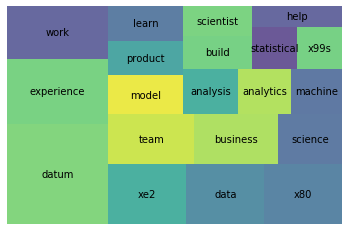

In [154]:
squarify.plot(sizes=top_20[426], label=top_20['index'], alpha=.8)
plt.axis('off')
plt.show();

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [158]:
##### Your Code Here #####
# Instantiate vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# create vocabulary and get word count
tfidf_dtm = tfidf.fit_transform(str(x) for x in df['tokens'])

# get feature names & create dataframe
tfidf_dtm = pd.DataFrame(tfidf_dtm.todense(), columns=tfidf.get_feature_names())

tfidf_dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zone,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.110779,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
# Add totals to use for visualization
tfidf_dtm = tfidf_dtm.append(tfidf_dtm.agg('sum'), ignore_index=True)

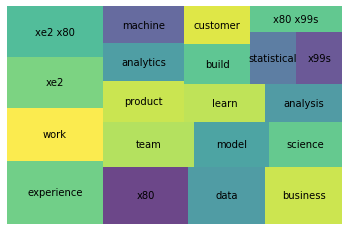

In [165]:
# Create visualization
totals = tfidf_dtm.tail(1)
top_20 = totals.T.sort_values(by=[426], ascending=False)[:20].reset_index()
squarify.plot(sizes=top_20[426], label=top_20['index'], alpha=.8)
plt.axis('off')
plt.show();

In [162]:
# tune paramters
tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3)

# create vocabulary and get word count
tfidf_dtm = tfidf.fit_transform(str(x) for x in df['tokens'])

# get feature names & create dataframe
tfidf_dtm = pd.DataFrame(tfidf_dtm.todense(), columns=tfidf.get_feature_names())

tfidf_dtm.head()

,000,000 employee,000 yearthe,04,10,10 time,10 year,100,100 000,100 company,...,year xe2,years,years datum,years experience,years xe2,yearthe,yes,york,york city,york offices
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
# Add totals to use for visualization
tfidf_dtm = tfidf_dtm.append(tfidf_dtm.agg('sum'), ignore_index=True)


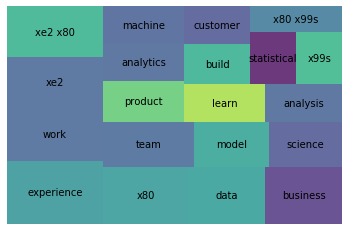

In [166]:
# Generate visualization
totals = tfidf_dtm.tail(1)
top_20 = totals.T.sort_values(by=[426], ascending=False)[:20].reset_index()
squarify.plot(sizes=top_20[426], label=top_20['index'], alpha=.8)
plt.axis('off')
plt.show();

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 